In [1]:
# %%
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import os
from experiment_utils import experiment
# %matplotlib widget

In [2]:
data_path = "../Data/FGG-Tripeptide/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='FGG')

In [3]:
otmol_name_res = experiment(data_path, molecule_pairs, setup='element name', alpha_list=np.linspace(0,0.5,50))
otmol_type_res = experiment(data_path, molecule_pairs, setup='atom type', alpha_list=np.linspace(0,0.5,50))
otmol_conn_res = experiment(data_path, molecule_pairs, setup='atom connectivity', alpha_list=np.linspace(0,0.5,50))

252_FGG55 253_FGG99 1.74
252_FGG55 254_FGG300 1.93
252_FGG55 255_FGG252 1.93
252_FGG55 256_FGG366 2.21
252_FGG55 257_FGG215 1.42
252_FGG55 258_FGG224 0.75
252_FGG55 259_FGG380 1.28
252_FGG55 260_FGG412 1.70
252_FGG55 261_FGG444 1.14
252_FGG55 262_FGG470 1.27
252_FGG55 263_FGG80 1.49
252_FGG55 264_FGG114 1.53
252_FGG55 265_FGG357 1.54
252_FGG55 266_FGG691 1.97
252_FGG55 253_FGG99 1.77
252_FGG55 254_FGG300 1.98
252_FGG55 255_FGG252 2.04
252_FGG55 256_FGG366 2.27
252_FGG55 257_FGG215 1.41
252_FGG55 258_FGG224 0.75
252_FGG55 259_FGG380 1.32
252_FGG55 260_FGG412 1.67
252_FGG55 261_FGG444 1.14
252_FGG55 262_FGG470 1.27
252_FGG55 263_FGG80 1.51
252_FGG55 264_FGG114 1.57
252_FGG55 265_FGG357 1.58
252_FGG55 266_FGG691 2.05
252_FGG55 253_FGG99 2.00
252_FGG55 254_FGG300 2.30
252_FGG55 255_FGG252 2.39
252_FGG55 256_FGG366 2.56
252_FGG55 257_FGG215 1.60
252_FGG55 258_FGG224 0.96
252_FGG55 259_FGG380 1.50
252_FGG55 260_FGG412 1.94
252_FGG55 261_FGG444 1.31
252_FGG55 262_FGG470 1.44
252_FGG55 263_FGG

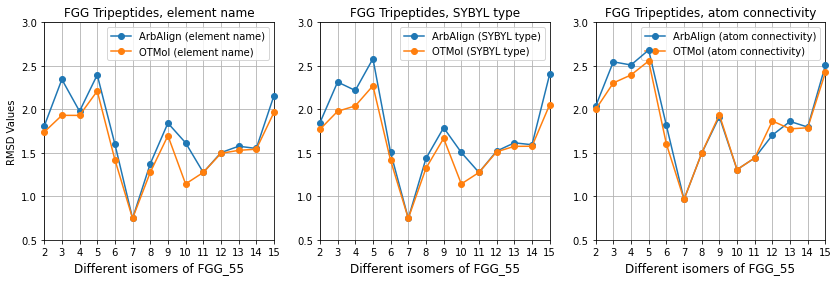

In [4]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(KM-ByAtomName)': 'ArbAlign (element name)', 
        'RMSD(KM-ByAtomType)': 'ArbAlign (SYBYL type)', 
        'RMSD(KM-byAtomConn)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)

plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.xlim(2,15)
plt.legend(loc='upper right')
plt.grid(True)

plt.savefig('../images/FGG.png', dpi=300, bbox_inches='tight')

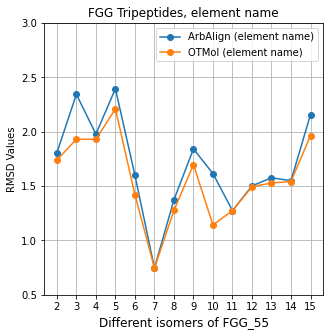

In [5]:
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_element_name.png', dpi=300, bbox_inches='tight')

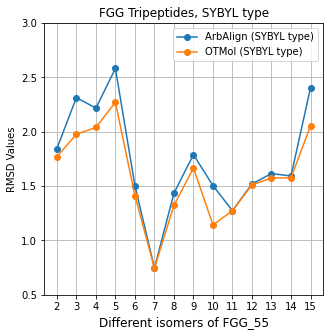

In [6]:
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, SYBYL type")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_SYBYL_type.png', dpi=300, bbox_inches='tight')

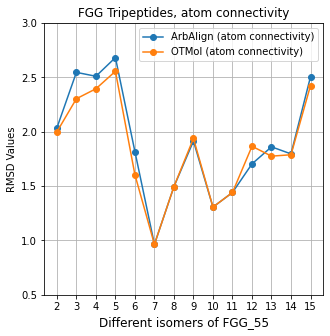

In [7]:
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
plt.figure(figsize=(5,5))
for column in columns_to_plot:
    plt.plot(range(2,16), combined_df[column], marker='o', label=column)
plt.title("FGG Tripeptides, atom connectivity")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
plt.savefig('../images/FGG_atom_connectivity.png', dpi=300, bbox_inches='tight')

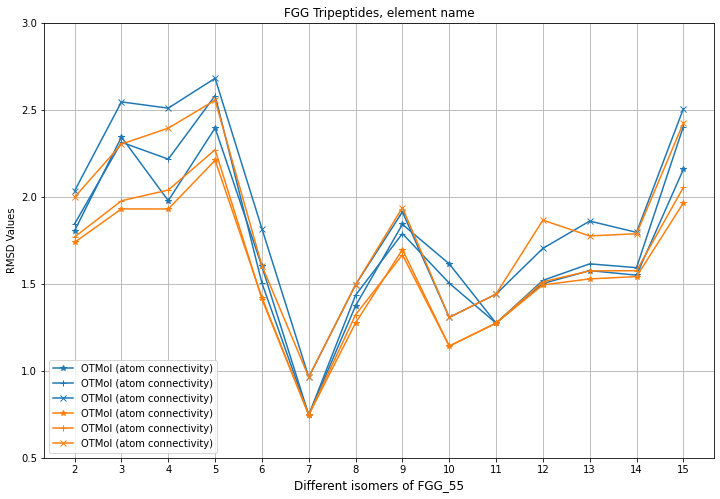

In [8]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(KM-ByAtomName)': 'ArbAlign (element name)', 
        'RMSD(KM-ByAtomType)': 'ArbAlign (SYBYL type)', 
        'RMSD(KM-byAtomConn)': 'ArbAlign (atom connectivity)'
        }), 
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'}
    ), 
    ], axis=1)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(12,8))
#for column in columns_to_plot:

plt.plot(range(2,16), combined_df['ArbAlign (element name)'], marker='*', color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['ArbAlign (SYBYL type)'], marker='+',  color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['ArbAlign (atom connectivity)'], marker='x', color='#1f77b4', label=column)
plt.plot(range(2,16), combined_df['OTMol (element name)'], marker='*', color='#ff7f0e', label=column)
plt.plot(range(2,16), combined_df['OTMol (SYBYL type)'], marker='+', color='#ff7f0e', label=column)
plt.plot(range(2,16), combined_df['OTMol (atom connectivity)'], marker='x', color='#ff7f0e', label=column)

plt.title("FGG Tripeptides, element name")
plt.xlabel("Different isomers of FGG_55", fontsize = 12)
plt.ylabel("RMSD Values")
plt.ylim(0.5, 3)
plt.xticks(range(2,16))
plt.legend()
plt.grid(True)
#plt.savefig('../images/FGG_element_name.png', dpi=300)

In [9]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/252_FGG55.xyz"))
molB = next(pybel.readfile("xyz", "../Data/FGG-Tripeptide/258_FGG224.xyz"))
X_A, T_A, B_A = otm.tl.process_molecule(molA) # Output (1) spatial coordinates, (2) atom types, and (3) bonds as numpy arrays.
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][5]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment = assignment, nameA = 'FGG55', nameB = 'FGG224', save = False)

0.7462840440918397
